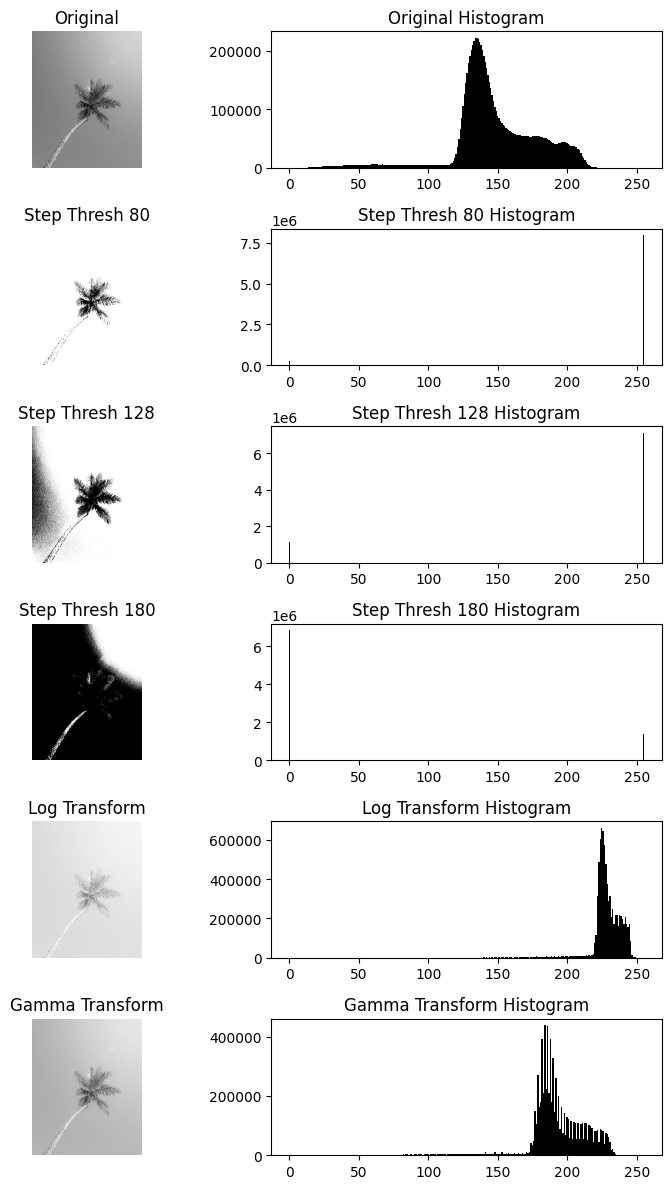

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)


def custom_threshold(img, thresh_value):
    result = np.zeros_like(img)
    result[img >= thresh_value] = 255
    return result


threshold_values = [80, 128, 180]
step_results = [custom_threshold(image, t) for t in threshold_values]


def log_transform(img, c=1):
    img_float = img.astype(np.float32)
    log_img = c * np.log1p(img_float)
    log_img = np.uint8(255 * log_img / np.max(log_img))
    return log_img

log_img = log_transform(image)


def gamma_transform(img, gamma=0.5):
    img_float = img.astype(np.float32) / 255.0
    gamma_img = np.power(img_float, gamma)
    gamma_img = np.uint8(255 * gamma_img)
    return gamma_img

gamma_img = gamma_transform(image, gamma=0.5)


titles = [
    "Original", 
    "Step Thresh 80", 
    "Step Thresh 128", 
    "Step Thresh 180", 
    "Log Transform", 
    "Gamma Transform"
]
images = [image] + step_results + [log_img, gamma_img]


fig, axes = plt.subplots(len(images), 2, figsize=(8, 12))

for i, (img, title) in enumerate(zip(images, titles)):
    
    axes[i, 0].imshow(img, cmap='gray')
    axes[i, 0].set_title(title)
    axes[i, 0].axis('off')

    
    axes[i, 1].hist(img.ravel(), bins=256, range=(0, 255), color='black')
    axes[i, 1].set_title(f"{title} Histogram")

plt.tight_layout()
plt.show()